<a href="https://colab.research.google.com/github/tangchini/OPTI556/blob/main/secondaryPtychography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time of flight ptychography
###David Brady
### University of Arizona

November 2021

### Python modules

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from scipy import signal, io
from scipy import integrate
%matplotlib inline
plt.rcParams['figure.figsize'] = [30, 10]
plt.rcParams.update({'font.size': 22})
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
import cv2
from keras.datasets import mnist


## Forward Model

We consider imaging on the system illustrated below. We consider an illumination source that projects a focused spot on to the reflecting wall. The focused spot produces an illumination wave $A\frac{e^{i 2 \pi \frac{(x-x_s)^2}{\lambda z}}}{z}$ in the object space, where $z$ is the range from the reflecting wall to the target. The return signal on the wall is
$$\psi(x')= A\int \int f(x,z)\frac{e^{i 2 \pi \frac{(x-x_s)^2}{\lambda z}}}{z}\frac{e^{-i 2 \pi \frac{(x'-x)^2}{\lambda z}}}{z} dx dz
$$
where, implicitly, $x$ corresponds to the 2D $xy$ plane. A remote camera array forms an image of $|\psi(x')|^2$. The measured signal is 
$$g(x')= \frac{|A|^2}{z^2}\left |\int f(x)e^{i 4 \pi \frac{(x'-x_s)x}{\lambda z}} dx  \right |^2
$$
where we assume for simplicity that $f(x,z)=f(x)\delta(z-z_o)$, e.g. that the object is a surface at a fixed distance. Thus, the observed signal is 
$$g(x')= \frac{|A|^2}{z^2}\left |{\hat f}\left ( u= \frac{2(x'-x_s)}{\lambda z}\right )\right |^2
$$
Where ${\hat f}(u)$ is the Fourier transform of $f(x)$. Thus, by scanning $x_s$ over a range of positions we can sample ${\hat f}(u)$ over the full plane. We use ptychographic phase retrieval to recover ${\hat f}(u)$ from the range of samples. 

The angular resolution with which we can reconstruct $f(x)$ is equal to the inverse of the maximum spatial frequency measured, $u_{\rm max}=\frac{2\Delta x}{\lambda z}=\frac{4A}{\lambda z}$, where $A$ is the aperture allowed $x$ and $x_s$. so the resolution is $\delta x=\frac{\lambda z}{4A}$. The field of view depends on the sampling rate in the fourier space. If the range from the camera array to the reflecting wall is $R$, this rate is $2 R/(z\alpha) $, where $\alpha $ is the aperture of the camera array. The FoV is $(z\alpha)/(2R) $. The number of points resolved is $(2A\alpha)/(\lambda R) $. The angular field of view is $\frac{\alpha}{R}$.

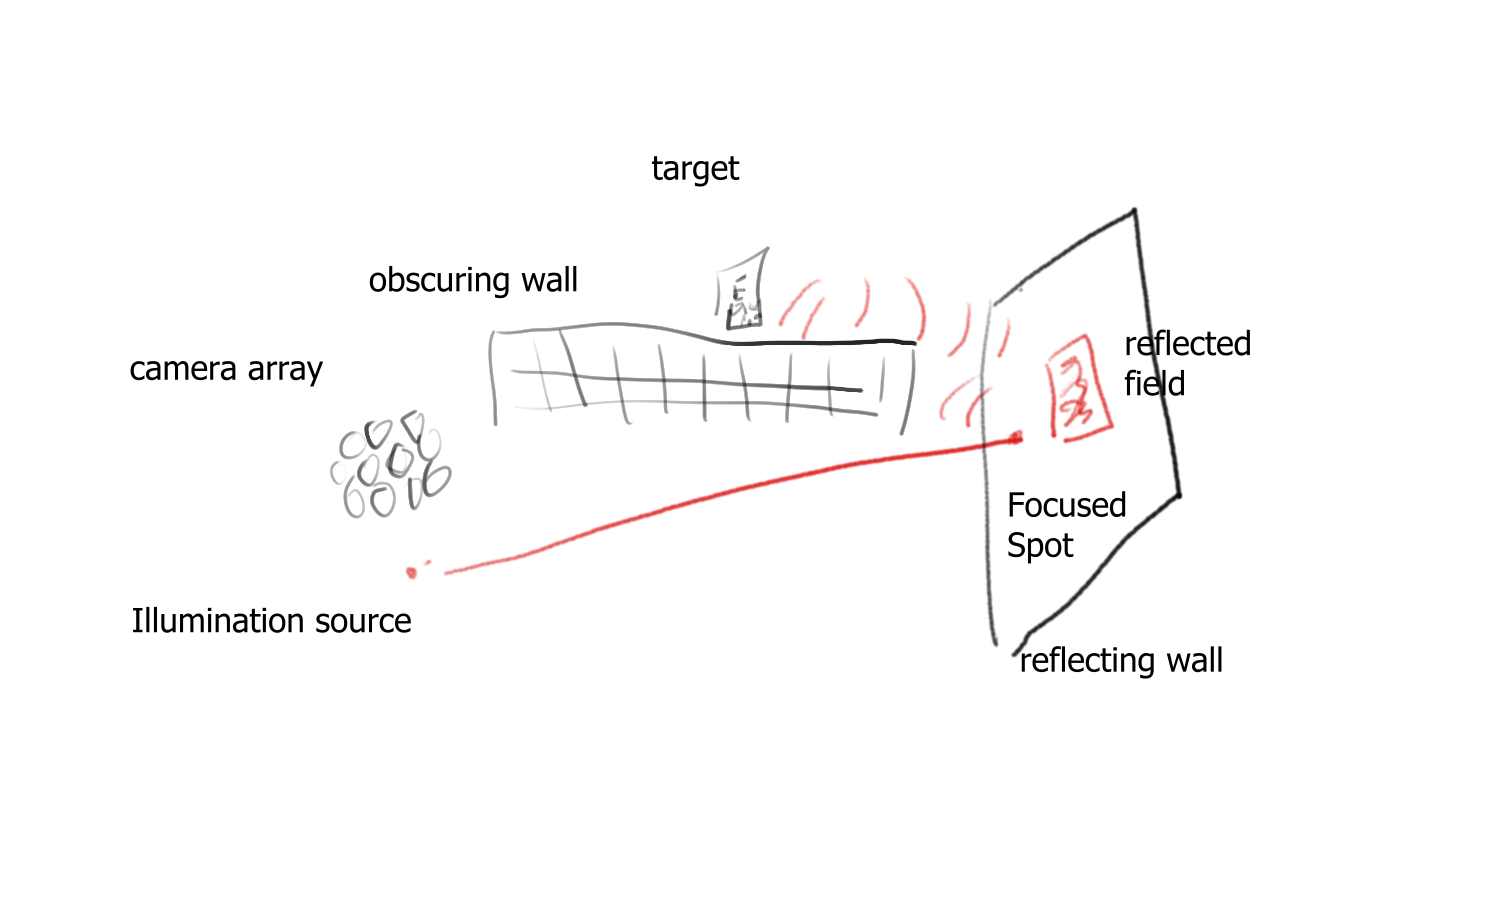